In [31]:
from knn_imputation import knnimputation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Usando raw string para la ruta absoluta
ruta_absoluta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_dev_imbalanced.csv"
df = pd.read_csv(ruta_absoluta)

# Imputar los valores faltantes usando KNNImputer
imputer = knnimputation()
df_imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(df_imputed, columns=df.columns)

# 3. Guardar el DataFrame resultante en un archivo CSV
ruta_salida = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_imbalanced.csv"
df_imputed.to_csv(ruta_salida, index=False)


In [25]:
from Problema1.src.preprocesing import OneHotEncoderCustom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

encoder = OneHotEncoderCustom()
ruta_absoluta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean.csv"
df_clean_one_hot = pd.read_csv(ruta_absoluta)
df_clean_one_hot = encoder.fit_transform(df_clean_one_hot)



Primeras filas del dataset:
    CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
0  63.423148   0.500594        1.473261         23.300222      26.791298   
1  72.906362   0.474808        1.361360         21.336137      29.856233   
2  70.711969   0.481701        1.403003         21.521406      30.582427   
3  73.210206   0.518071        1.427612         22.437077      29.887970   
4  68.348288   0.494520        1.454116         21.150723      28.328197   

   CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  OxygenSaturation  \
0      0.477657     3.434832         2.492852    -10.000000         78.625935   
1      0.481035     2.702433         2.281137     63.084699         80.456292   
2      0.472651     2.786606         2.318029     61.347022         79.131699   
3      0.439511     2.998380         2.149232     64.047169         80.693058   
4      0.475881     2.987601         2.428480     62.197197         81.737990   

   Vascularization  Inflamma

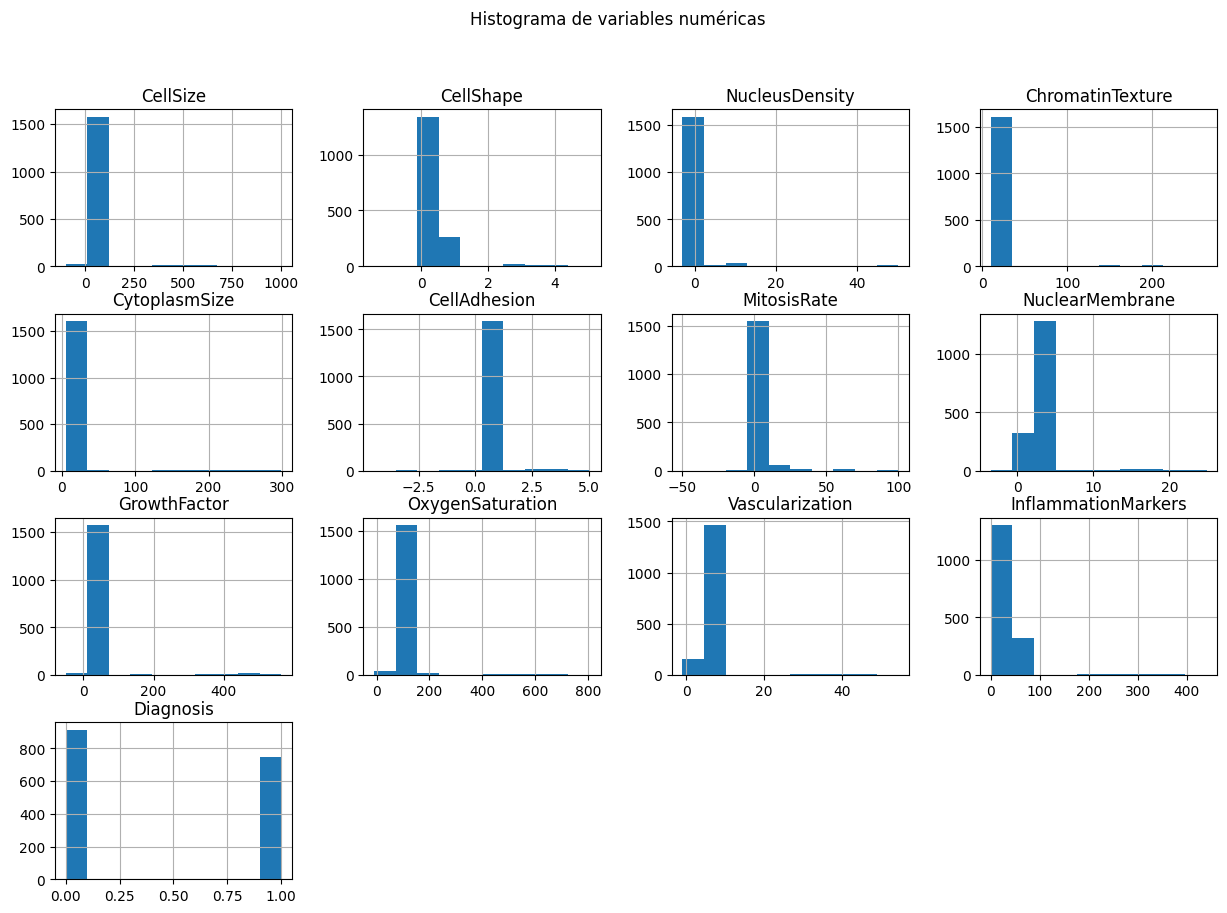

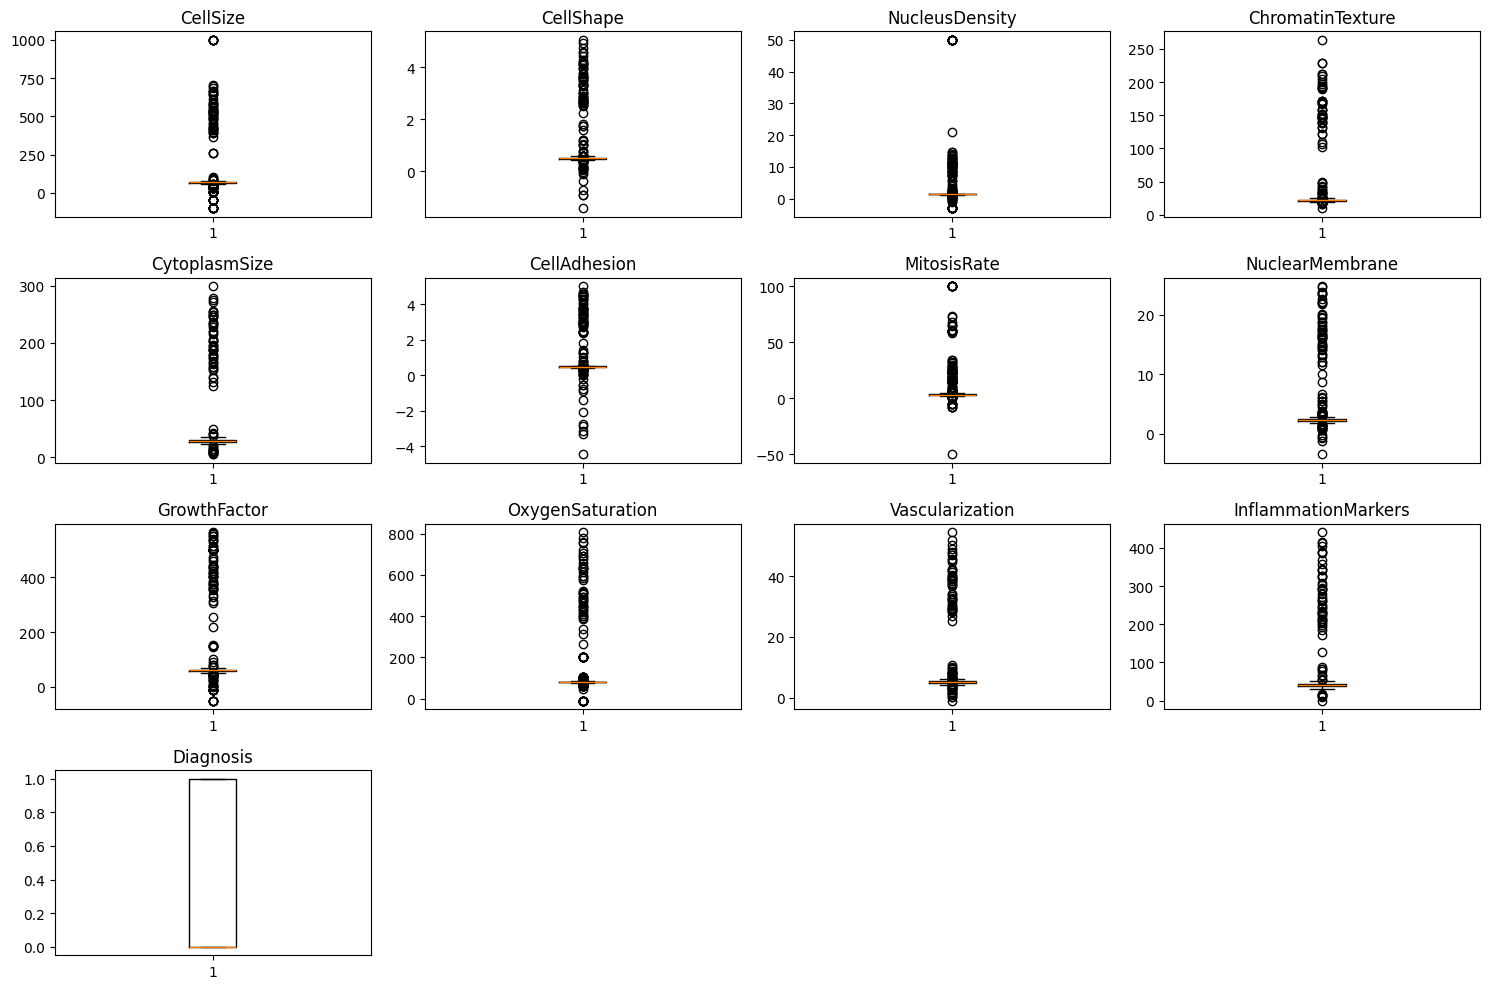


Variables categóricas:
Index([], dtype='object')

Correlación de cada variable con 'Diagnosis':
Diagnosis                 1.000000
CytoplasmSize             0.071340
GrowthFactor              0.070641
CellSize                  0.060557
GeneticMutation_Absnt     0.026429
OxygenSaturation          0.024300
CellShape                 0.016306
CellType_???              0.014540
CellType_Mesnchymal       0.013718
Vascularization           0.008895
ChromatinTexture          0.003003
NucleusDensity            0.000272
CellAdhesion             -0.005088
CellType_Epthlial        -0.021572
GeneticMutation_Presnt   -0.026429
MitosisRate              -0.043226
NuclearMembrane          -0.053870
InflammationMarkers      -0.076268
GeneticMutation_???            NaN
Name: Diagnosis, dtype: float64


In [8]:
df = df_clean_one_hot.copy()

# Visualizar las primeras filas
print("Primeras filas del dataset:")
print(df.head())
print("\nInformación general del dataset:")
print(df.info())

# 2. Detección de valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# 3. Estadísticas descriptivas para conocer los rangos y distribuciones
print("\nEstadísticas descriptivas:")
print(df.describe())

# 4. Visualización de la distribución de variables numéricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns].hist(figsize=(15, 10))
plt.suptitle("Histograma de variables numéricas")
plt.show()

# Boxplots para identificar outliers en variables numéricas
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  # Ajustar filas/columnas según la cantidad de variables
    plt.boxplot(df[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

# 5. Identificación de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nVariables categóricas:")
print(categorical_columns)

# Para cada variable categórica, se puede hacer un conteo de frecuencia
for col in categorical_columns:
    print(f"\nFrecuencia de la variable '{col}':")
    print(df[col].value_counts())

# 6. Análisis de correlación con el target (daignosis)

# Si el target es de tipo objeto, convertirlo a numérico (por ejemplo, codificando las categorías)
if df['Diagnosis'].dtype == 'object':
        df['Diagnosis'] = df['Diagnosis'].astype('category').cat.codes

# Calcular la matriz de correlación y extraer la correlación con 'daignosis'
correlations = df.corr()['Diagnosis'].sort_values(ascending=False)
print("\nCorrelación de cada variable con 'Diagnosis':")
print(correlations)


In [6]:
# eliminar la columna GeneticMutation_???

df = df.drop(columns=['GeneticMutation_???'])
# 7. Guardar el DataFrame limpio y preprocesado
ruta_salida = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_one_hot.csv"
df.to_csv(ruta_salida, index=False)

NameError: name 'df' is not defined

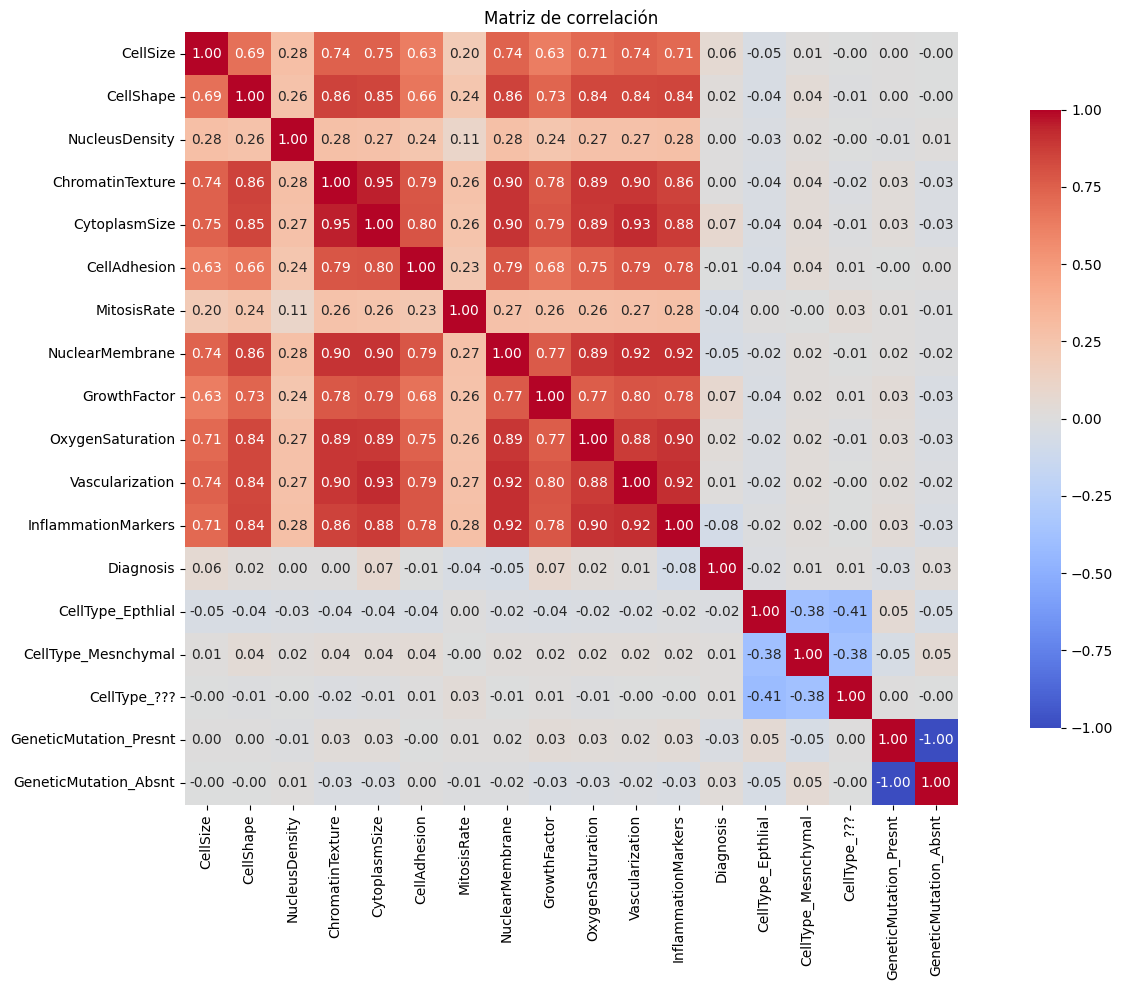

In [6]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Matriz de correlación")
plt.tight_layout()
plt.show()

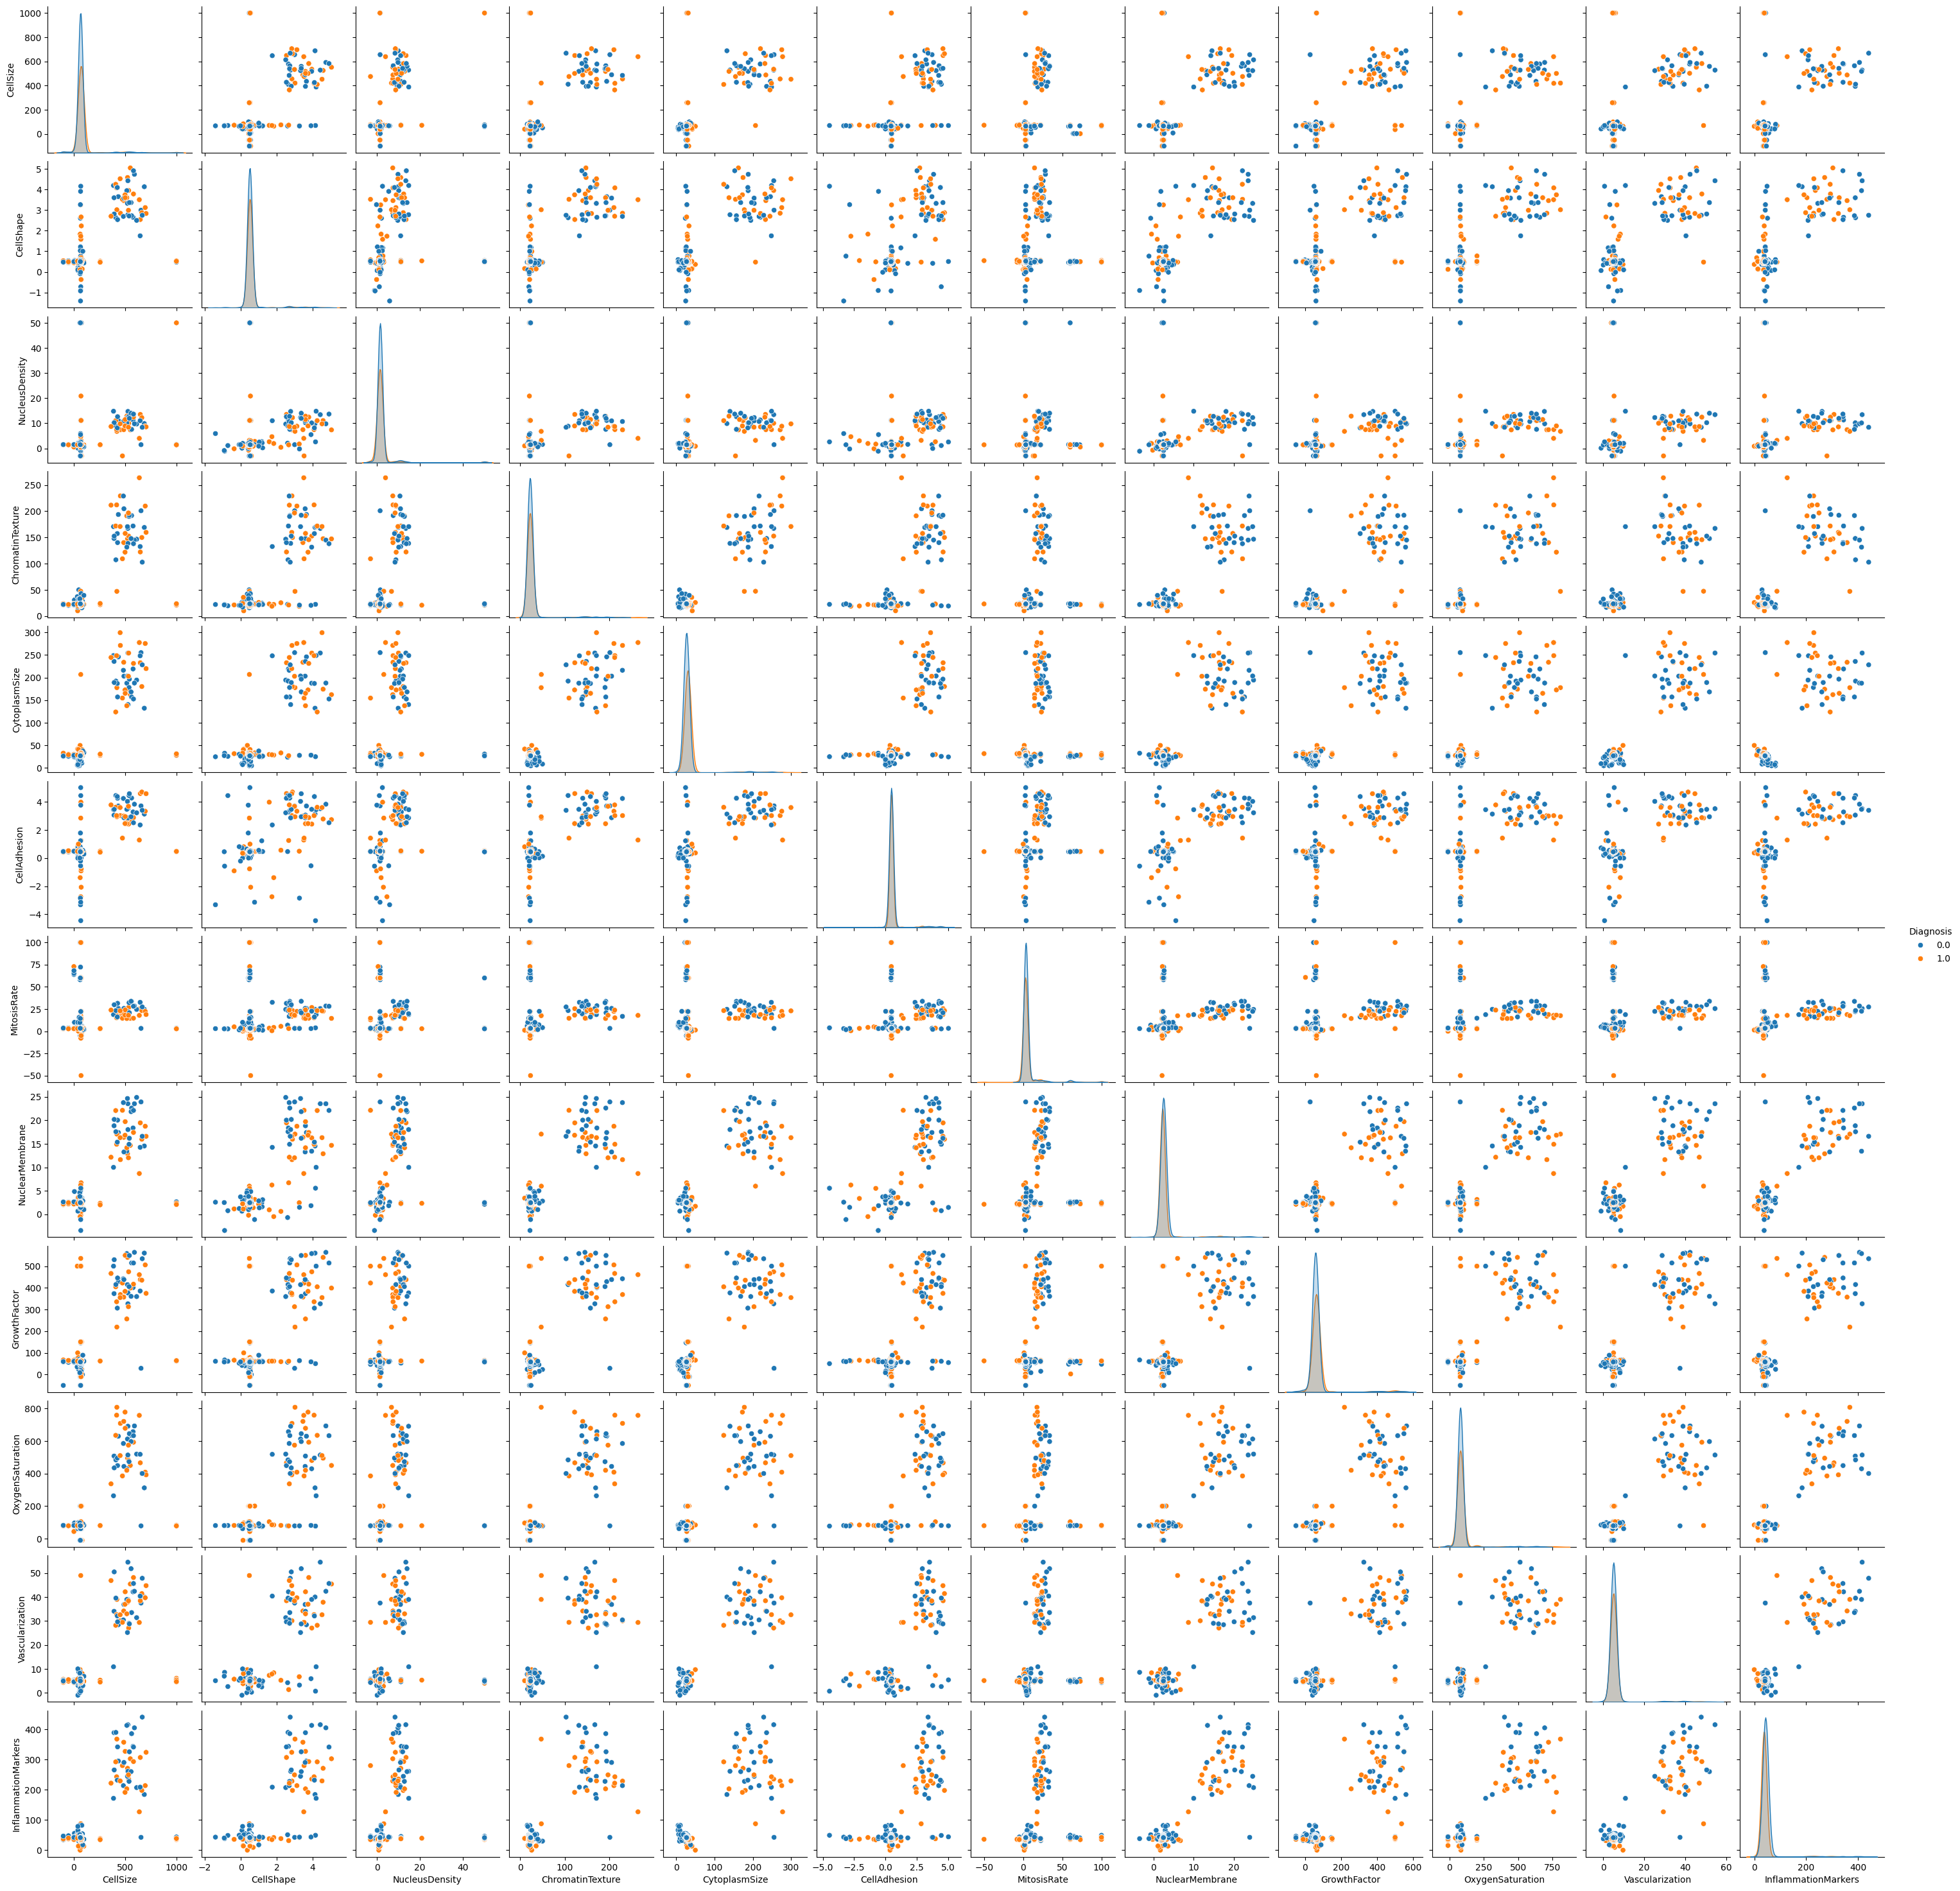

In [ ]:

df1 = df.copy()
columnas_one_hot1 = df1.columns[df.columns.str.startswith('GeneticMutation_')].tolist()
columnas_one_hot2 = df1.columns[df.columns.str.startswith('CellType_')].tolist()

x = df1.drop(columns=columnas_one_hot1 + columnas_one_hot2)


#hacer un pairplot de los datos
sns.pairplot(x, hue='Diagnosis', diag_kind='kde')
plt.show()


In [2]:
from Problema1.src.models import LogisticRegressionMulticlass
from Problema1.src.preprocesing import TrainTestSplit
import pandas as pd
import matplotlib.pyplot as plt

df =pd.read_csv(r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_one_hot.csv")

spliter = TrainTestSplit(test_size=0.2, random_state=42, shuffle=False)
x_train, x_test = spliter.split(df)

# Separar las características y la variable objetivo
X_train = x_train.drop(columns=['Diagnosis'])
y_train = x_train['Diagnosis']

X_test = x_test.drop(columns=['Diagnosis'])
y_test = x_test['Diagnosis']



Iteración 0, costo: 15.999797
Iteración 100, costo: 15.949396
Iteración 200, costo: 15.833211
Iteración 300, costo: 15.546038
Iteración 400, costo: 15.050789
Iteración 500, costo: 13.221355
Iteración 600, costo: 12.416224
Iteración 700, costo: 4.406427
Iteración 800, costo: 4.033474
Iteración 900, costo: 3.965179
Iteración 0, costo: 15.617560
Iteración 100, costo: 15.597683
Iteración 200, costo: 15.438966
Iteración 300, costo: 15.272678
Iteración 400, costo: 14.789763
Iteración 500, costo: 13.660077
Iteración 600, costo: 12.629108
Iteración 700, costo: 4.129161
Iteración 800, costo: 3.967488
Iteración 900, costo: 16.341559
Iteración 0, costo: 15.945194
Iteración 100, costo: 15.899017
Iteración 200, costo: 15.742917
Iteración 300, costo: 15.547943
Iteración 400, costo: 15.185031
Iteración 500, costo: 13.856651
Iteración 600, costo: 12.319497
Iteración 700, costo: 12.751561
Iteración 800, costo: 4.474849
Iteración 900, costo: 4.229169
Iteración 0, costo: 15.726769
Iteración 100, costo: 1

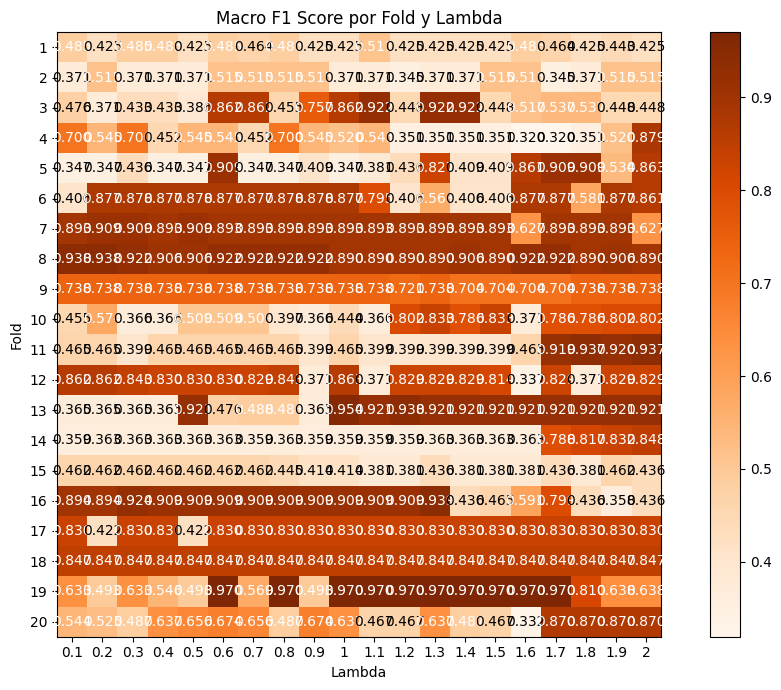

In [4]:
from Problema1.src.crossval import cross_validate_lambda_f1

lambdas = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,1.7, 1.8, 1.9, 2]
scores = cross_validate_lambda_f1(LogisticRegressionMulticlass, X_train, y_train, lambdas, verbose=True)

In [14]:
model = LogisticRegressionMulticlass(reg_lambda=1.7, n_iters=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

y_scores = model.predict_proba(X_test)
#solo ver la probabilidad de la clase 1
y_scores = y_scores[:, 1]
print(y_scores)

[1.47982064e-017 1.00000000e+000 1.00000000e+000 1.00000000e+000
 1.03238930e-011 9.37091583e-055 9.99984859e-001 1.00000000e+000
 9.99465515e-001 1.43362951e-022 1.00000000e+000 7.64057349e-026
 1.00000000e+000 1.00000000e+000 1.00000000e+000 4.08461048e-023
 1.36203762e-012 6.03953683e-010 1.79888755e-012 1.00000000e+000
 6.07333608e-047 3.59733976e-014 1.01959682e-147 1.41603111e-032
 1.00000000e+000 1.00000000e+000 1.00000000e+000 1.00000000e+000
 2.00745972e-026 1.31653320e-012 1.51514006e-041 2.07675696e-020
 1.00000000e+000 1.00000000e+000 9.99999869e-001 2.78972371e-023
 3.57137521e-008 1.00000000e+000 1.00000000e+000 5.80453525e-031
 1.00000000e+000 1.56501461e-019 1.00000000e+000 1.00000000e+000
 6.21629748e-011 6.14999606e-025 1.00000000e+000 1.00000000e+000
 1.50205285e-015 1.51230719e-024 1.00000000e+000 1.00000000e+000
 2.59661658e-011 2.27997290e-018 2.56081472e-030 4.91633702e-033
 9.94894929e-001 7.97467022e-001 5.30483043e-036 1.10264294e-032
 9.04223166e-013 1.000000

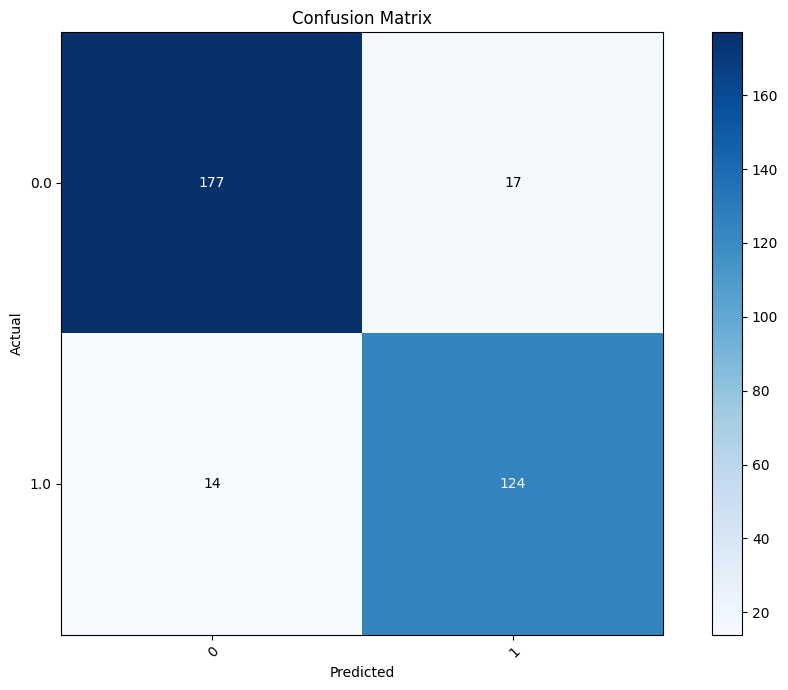

In [ ]:
import numpy as np

#Crear la matriz de confusión sin usar sklearn (sin márgenes)
cm = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=False)

# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(10, 7))

# Mostrar la matriz como una imagen (heatmap) con el cmap "Blues"
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

# Añadir una barra de color
cbar = ax.figure.colorbar(im, ax=ax)

# Configurar los ticks con las etiquetas de las clases
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=cm.columns,
       yticklabels=cm.index,
       ylabel='Actual',
       xlabel='Predicted')

# Rotar las etiquetas del eje x para mejor legibilidad
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Anotar cada celda con su valor
thresh = cm.values.max() / 2.  # umbral para cambiar el color del texto
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm.values[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm.values[i, j] > thresh else "black")

ax.set_title("Confusion Matrix")
fig.tight_layout()
plt.show()

Accuracy: 0.9066
Precision: 0.8794
Recall: 0.8986
F1 Score: 0.8889
ROC AUC: 0.5000


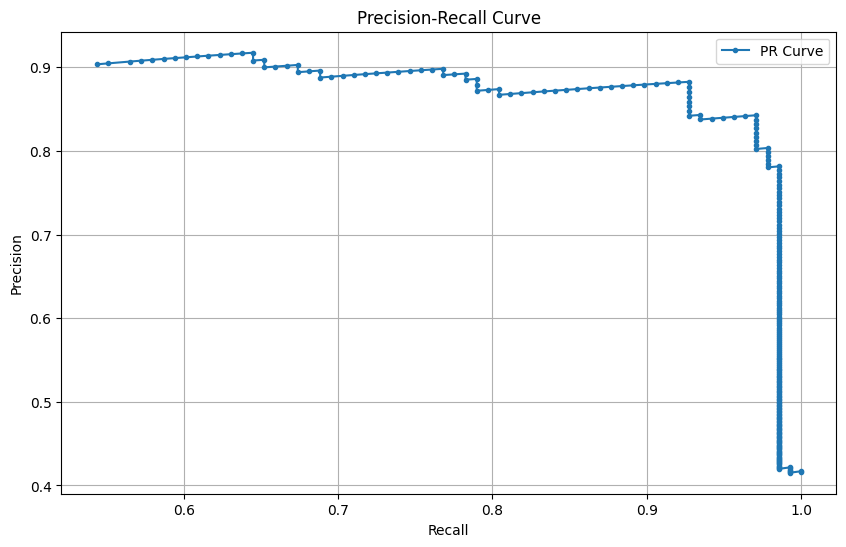

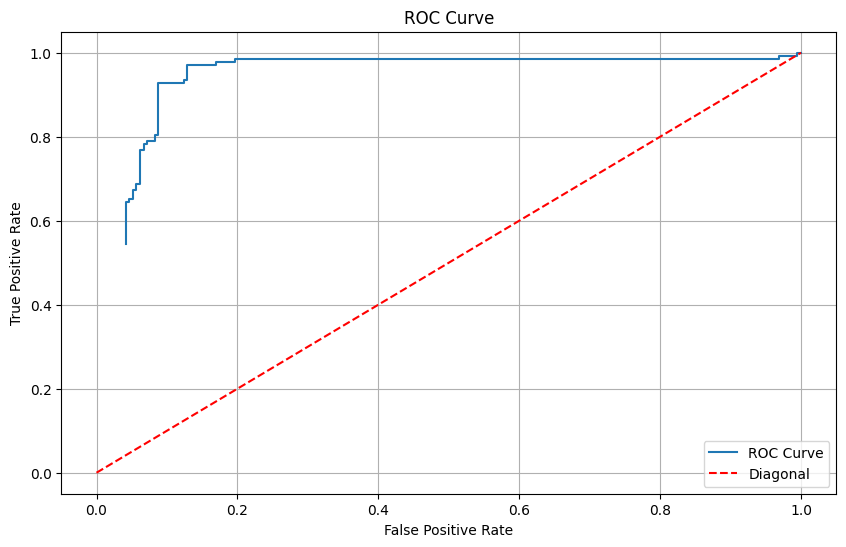

In [23]:
from Problema1.src.metrics import (
    compute_accuracy, compute_precision, compute_recall, compute_f1,
    compute_precision_recall_curve, compute_roc_curve, compute_auc
)
import matplotlib.pyplot as plt

# Calcular métricas básicas
accuracy = compute_accuracy(y_test, y_pred)
precision_metric = compute_precision(y_test, y_pred)
recall_metric = compute_recall(y_test, y_pred)
f1_metric = compute_f1(y_test, y_pred)
roc_auc = compute_auc(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_metric:.4f}")
print(f"Recall: {recall_metric:.4f}")
print(f"F1 Score: {f1_metric:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calcular la curva Precision-Recall
precision_curve, recall_curve, pr_thresholds = compute_precision_recall_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, marker='.', label='PR Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

# Calcular la curva ROC
fpr, tpr, roc_thresholds = compute_roc_curve(y_test, y_scores)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
# Agregar la recta diagonal de (0,0) a (1,1)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

    


In [32]:
ruta = r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_test.csv"
df_test = pd.read_csv(ruta)

df_test = imputer.fit_transform(df_test)

df_test = encoder.fit_transform(df_test)
df_test = df_test.drop(columns=['GeneticMutation_???'])
# Separar las características y la variable objetivo
X_test = df_test.drop(columns=['Diagnosis'])
y_test = df_test['Diagnosis']
y_pred_test = model.predict(X_test)
y_scores_test = model.predict_proba(X_test)
y_scores_test = y_scores_test[:, 1]



Accuracy: 0.8973
Precision: 0.8902
Recall: 0.8795
F1 Score: 0.8848
ROC AUC: 0.0002


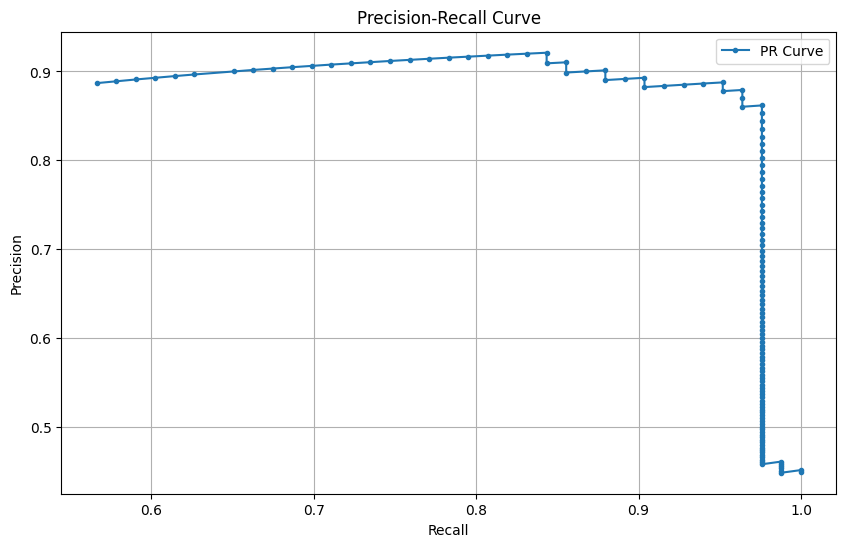

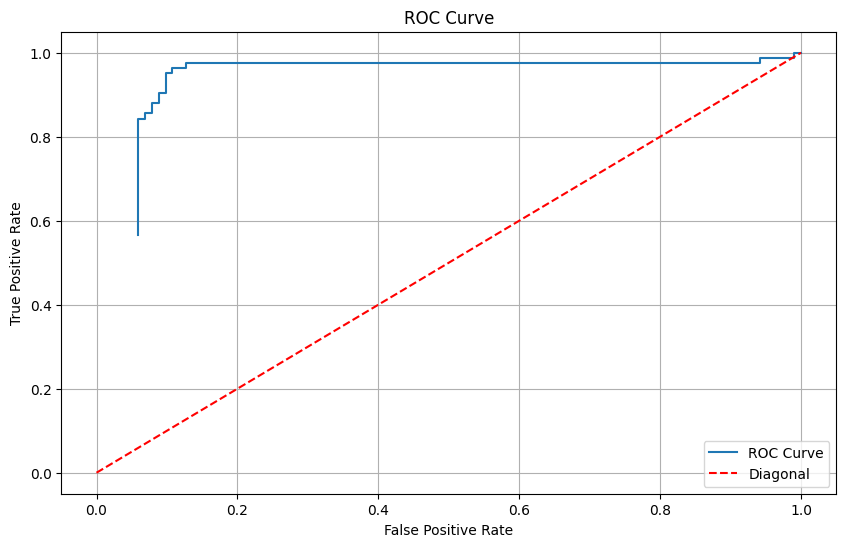

In [36]:
# Calcular métricas básicas
accuracy = compute_accuracy(y_test, y_pred_test)
precision_metric = compute_precision(y_test, y_pred_test)
recall_metric = compute_recall(y_test, y_pred_test)
f1_metric = compute_f1(y_test, y_pred_test)
roc_auc = compute_auc(y_test, y_scores_test)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision_metric:.4f}")
print(f"Recall: {recall_metric:.4f}")
print(f"F1 Score: {f1_metric:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calcular la curva Precision-Recall
precision_curve, recall_curve, pr_thresholds = compute_precision_recall_curve(y_test, y_scores_test)
plt.figure(figsize=(10, 6))
plt.plot(recall_curve, precision_curve, marker='.', label='PR Curve')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid()
plt.legend()
plt.show()

# Calcular la curva ROC
fpr, tpr, roc_thresholds = compute_roc_curve(y_test, y_scores_test)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC Curve')
# Agregar la recta diagonal de (0,0) a (1,1)
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label='Diagonal')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.grid()
plt.legend()
plt.show()

In [37]:
ruta =r"C:\Users\andyd\Udesa\Machine Learning\Domato_Santino_TP2\Problema1\Data\cell_diagnosis_clean_imbalanced.csv"

df_imbalanced = pd.read_csv(ruta)
df_imbalanced = encoder.fit_transform(df_imbalanced)
df_imbalanced = df_imbalanced.drop(columns=['GeneticMutation_???'])
# Separar las características y la variable objetivo

x_train_imbalanced, x_test_imbalanced = spliter.split(df_imbalanced)
y_train_imbalanced = x_train_imbalanced['Diagnosis']
y_test_imbalanced = x_test_imbalanced['Diagnosis']